### Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### Plots

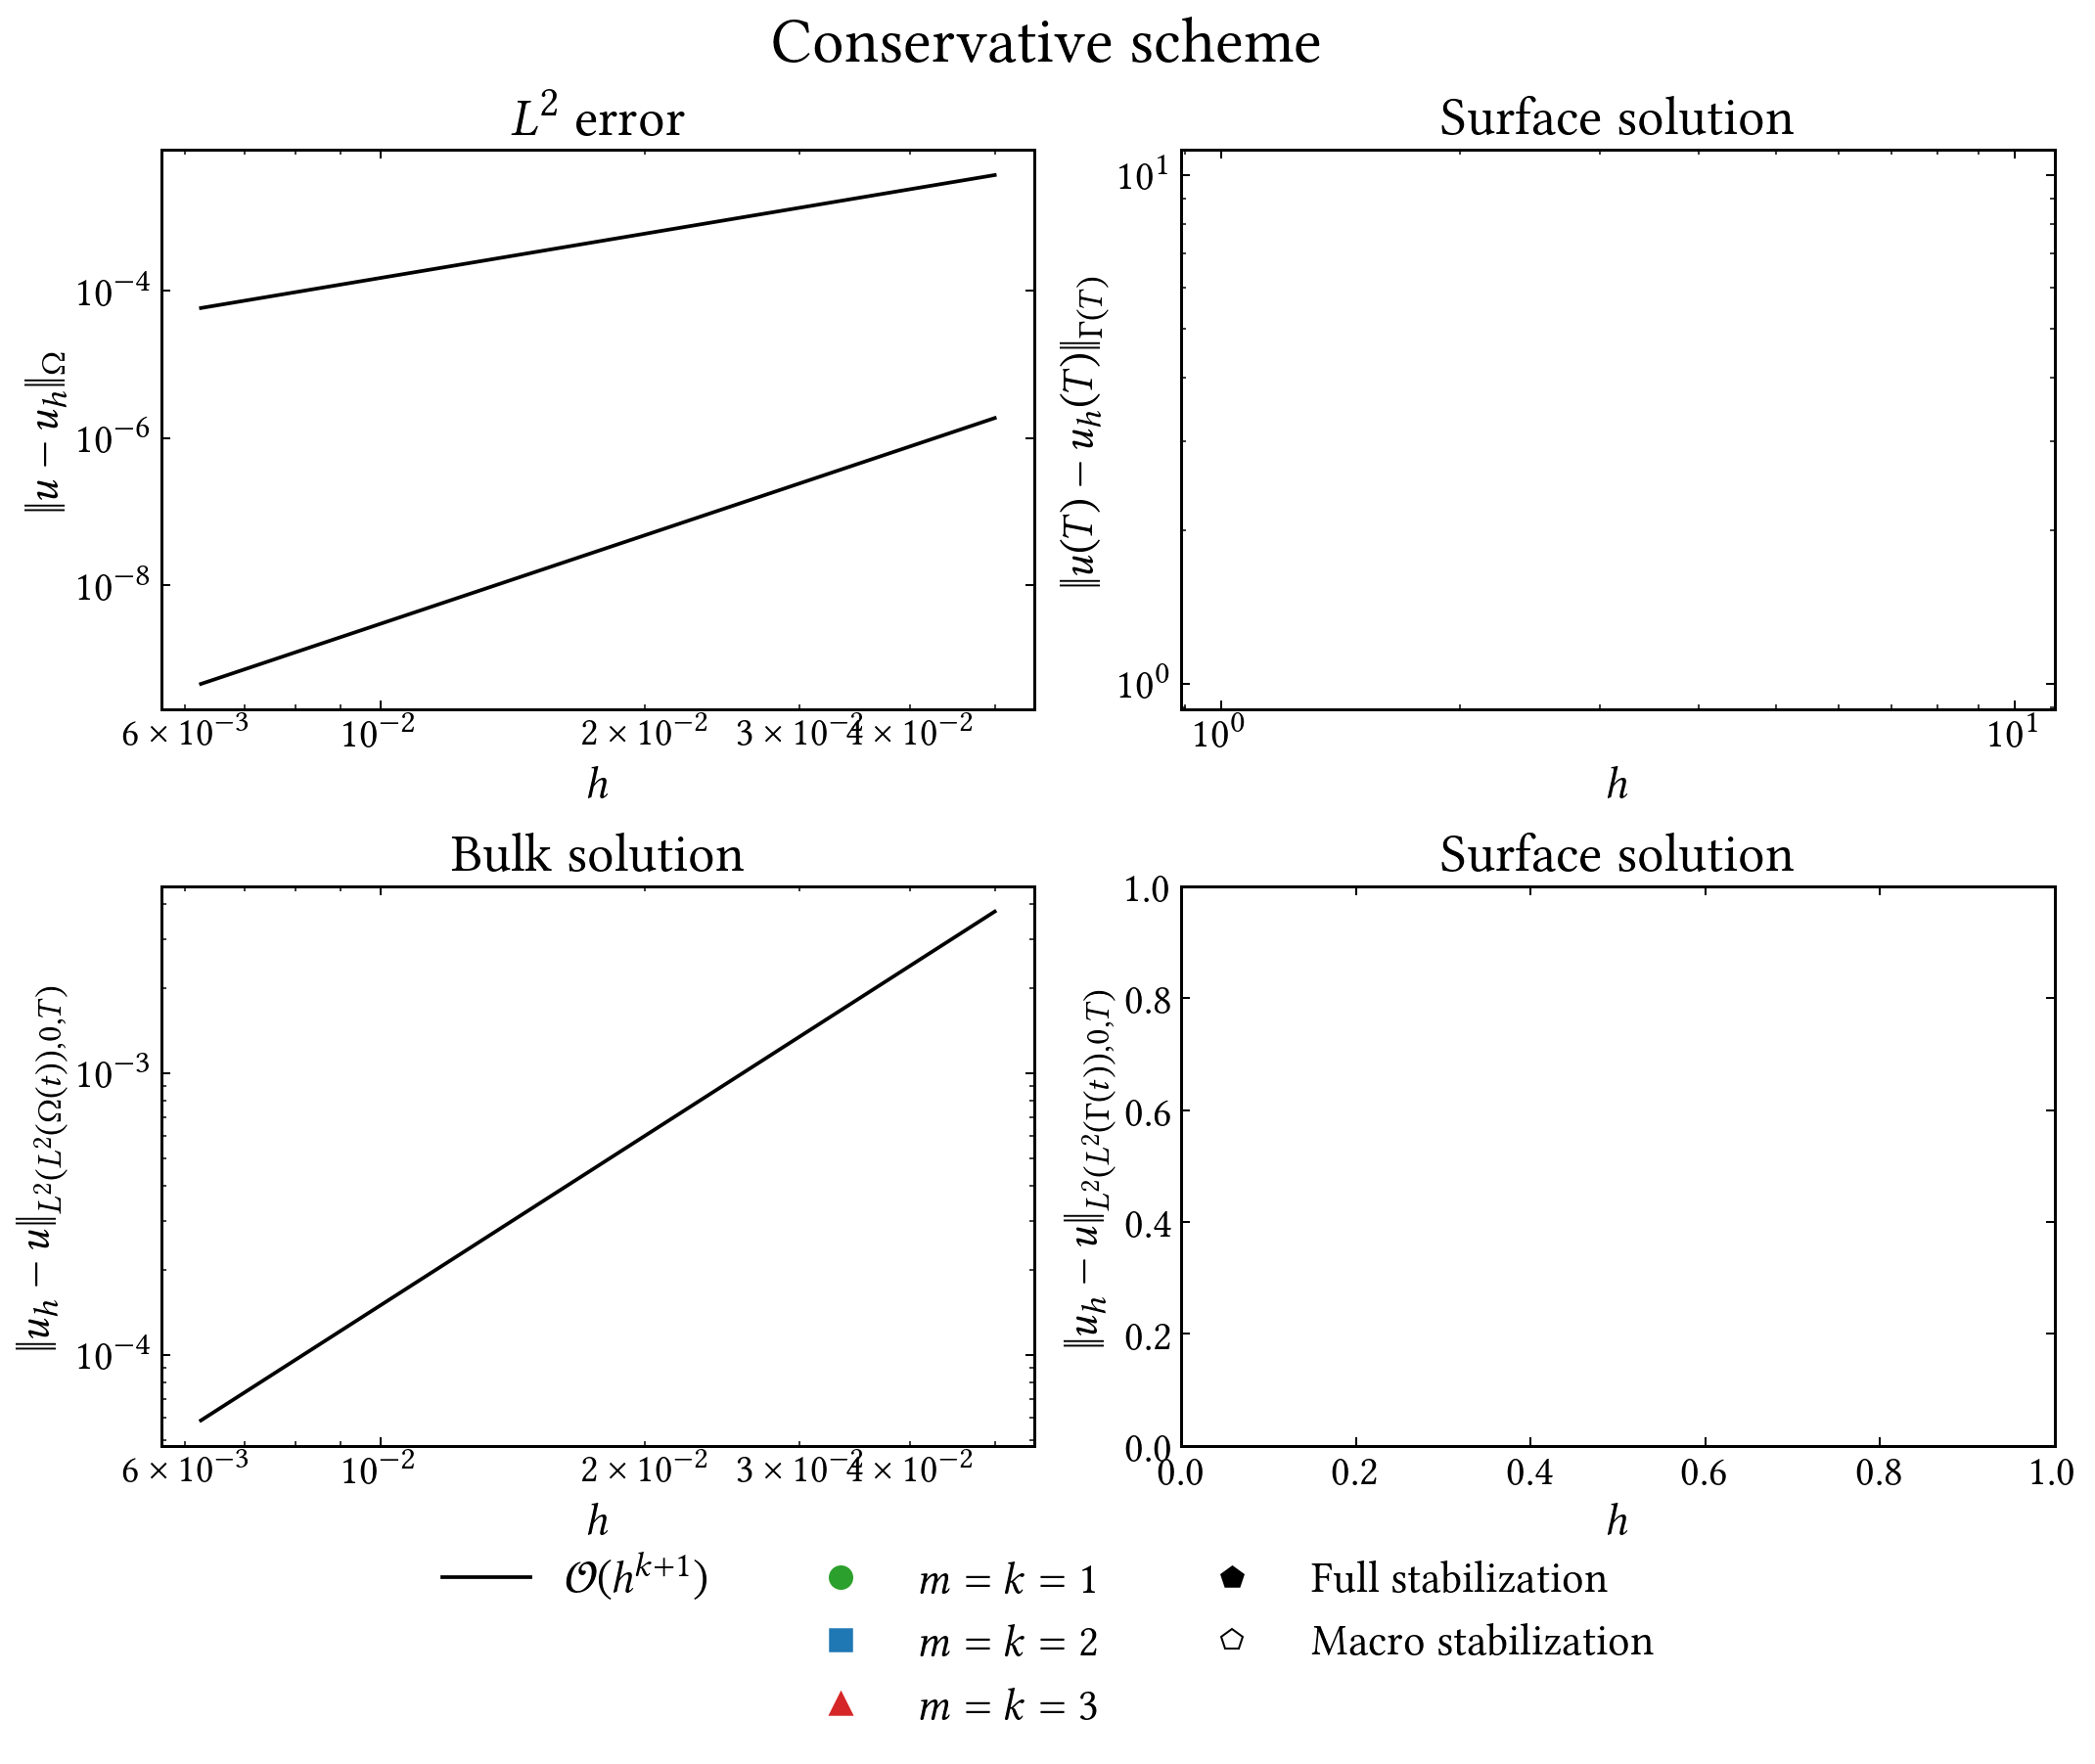

In [2]:
# regular mesh
h = [0.1, 0.05, 0.025, 0.0125]
N = [200, 800, 3200, 12800]

# Ra = 1, lambda = 1e1, regular mesh
err_u_ra_1e0 = [3.468614000171409e-05, 2.274158404306178e-07, 1.447146087210906e-09, 4.724387427318006e-12]
err_p_ra_1e0 = [0.00131497589281262, 0.0002112032195808919, 4.952420749807949e-05, 1.217960333415723e-05]
err_grad_ra_1e0 = [0.0002269292958139199, 3.447326411619173e-06, 9.255062111987746e-08, 1.103930485185392e-09]
err_div_ra_1e0 = [1.447214743877101e-14, 2.949765458758051e-14, 6.73089126692148e-14, 2.636189839102089e-13]

# Ra = 1, lambda = 1e7, regular mesh
err_u_ra_1e0 = [1.812016722762194e-11, 2.376080035563172e-13, 1.53402020994982e-15, 2.004157741807925e-16]
err_p_ra_1e0 = [0.001839672937041298, 0.000459925925749046, 0.0001149756966752645, 2.881629313389986e-05]
err_grad_ra_1e0 = [5.758191798725681e-10, 1.520051082067384e-11, 1.971423032888136e-13, 5.93347885255457e-15]
err_div_ra_1e0 = [1.374983940264014e-14, 2.840484321117415e-14, 1.188421092983064e-13, 1.389543849216974e-13]

# Ra = 1, lambda = 1e1, Powell-Sabin mesh
err_u_ra_1e0 = [9.723795191455951e-06, 7.901558838855177e-09, 2.01972920034334e-10, 2.803909491027998e-08]
err_p_ra_1e0 = [19.28598971971109, 727.6476690679859, 40762.57027275571, 5477723751.827546]
err_grad_ra_1e0 = [5.053239713115048e-05, 3.319440179073853e-07, 1.193389678681378e-07, 2.026430894388386e-05]
err_div_ra_1e0 = [5.170237339386513e-13, 1.607535853746508e-11, 2.036015518305798e-09, 0.0001643672141625105]

# Ra = 1, lambda = 1e7, Powell-Sabin mesh
err_u_ra_1e0 = [1.224637072906876e-12, 1.916163895261262e-06, 1.416007162699042e-11, 8.928033075005506e-13]
err_p_ra_1e0 = [392.8761518176171, 16797163162.95951, 14187.17893216807, 29690.94592835813]
err_grad_ra_1e0 = [4.310164921699995e-11, 3.254336783011601e-05, 8.256041943571689e-09, 4.101963117747654e-10]
err_div_ra_1e0 = [4.79862481700525e-12, 0.000718564673161521, 3.797687064012445e-10, 5.049747796058859e-09]

# powell-sabin
h = [0.05, 0.025, 0.0125, 0.00625]
N = [1200, 4800, 19200, 76800]

# Ra = 1e3, lambda = 1e7
err_u_ra_1e3 = [1.812016608597777e-08, 2.376059668345405e-10, 1.529014122510998e-12, 1.969081869022467e-13]
err_p_ra_1e3 = [1.839672938896543, 0.4599259036851933, 0.1149741596710596, 0.02876690081000432]
err_grad_ra_1e3 = [5.758194594508891e-07, 1.520039879568065e-08, 1.96940272801568e-10, 5.613858766962793e-12]
err_div_ra_1e3 = [3.170766664892244e-11, 2.098169590986131e-11, 9.753489015859242e-11, 9.296484189854777e-11]


fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Conservative scheme", fontsize=26)

#! L2 error
axs[0,0].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[0,0].loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black")  

axs[0,0].set_xlabel(r"$h$", fontsize=18)
axs[0,0].tick_params(axis='both', which='major', labelsize=17)
axs[0,0].set_ylabel(r"$\|u-u_h\|_{\Omega}$", fontsize=18)
axs[0,0].set_title(r"$L^2$ error")


axs[0,1].loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
axs[0,1].loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
axs[0,1].loglog([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
axs[0,1].loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
axs[0,1].loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")

axs[0,1].set_title(r"Surface solution")
axs[0,1].set_xlabel(r"$h$", fontsize=18)
axs[0,1].tick_params(axis='both', which='major', labelsize=17)
axs[0,1].set_ylabel(r"$\|u(T)-u_h(T)\|_{\Gamma(T)}$", fontsize=18)

#! 
axs[1,0].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[1,0].set_xlabel(r"$h$", fontsize=18)
axs[1,0].tick_params(axis='both', which='major', labelsize=17)
axs[1,0].set_ylabel(r"$\|u_h-u\|_{L^2(L^2(\Omega(t)), 0, T)}$")
axs[1,0].set_title(r"Bulk solution")

axs[1,1].set_title(r"Surface solution")
axs[1,1].set_xlabel(r"$h$", fontsize=18)
axs[1,1].tick_params(axis='both', which='major', labelsize=17)
axs[1,1].set_ylabel(r"$\|u_h-u\|_{L^2(L^2(\Gamma(t)), 0, T)}$")

handles, labels = [(a + b) for a, b in zip(axs[0,0].get_legend_handles_labels(), axs[0,1].get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)

plt.tight_layout()
plt.show()
